# 'Simple Linear Regression'

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [136]:
df = pd.read_csv("placement.csv")

In [142]:
df.head(5)

,cgpa,placement marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


## This dataset not showing linear relationship that why we not use this dataset

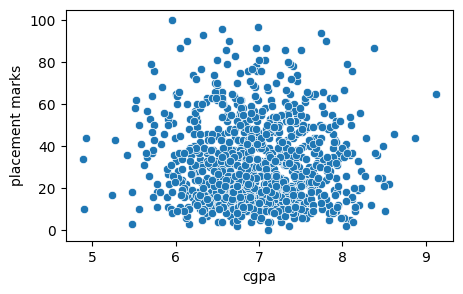

In [147]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="cgpa" , y="placement marks" , data=df)
plt.show()

## New dataset

In [148]:
# new dataset
df = pd.read_csv("Salary_Data.csv")

In [149]:
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


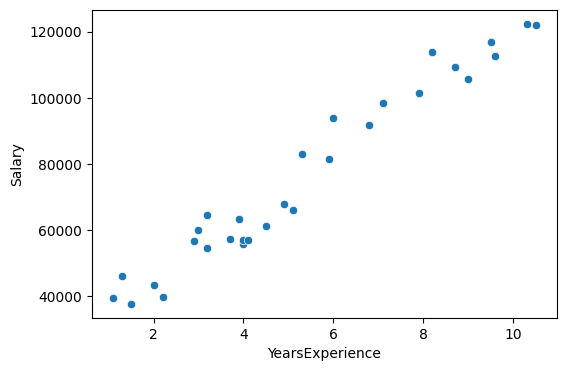

In [150]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="YearsExperience" , y="Salary" , data=df)
plt.show()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


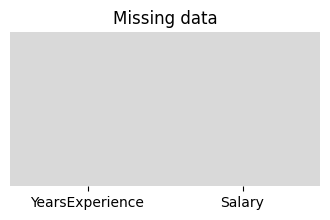

In [154]:
plt.figure(figsize=(4,2))
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap="tab20c_r")
plt.title("Missing data")
plt.show()

## Training the model

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [156]:
y = df.drop("YearsExperience",axis=1)
x = df.drop("Salary",axis=1)

In [157]:
x.head(3)

,YearsExperience
0,1.1
1,1.3
2,1.5


In [158]:
y.head(3)

,Salary
0,39343.0
1,46205.0
2,37731.0


In [159]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [160]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


In [161]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [162]:
pred = lr.predict(x_test)
pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [165]:
print("Mean square error")
print("--"*40)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print("Mean error : ",mse)
print("Root : ",rmse)

Mean square error
--------------------------------------------------------------------------------
Mean error :  12823412.298126549
Root :  3580.979237321343


In [166]:
lr.coef_

array([[9312.57512673]])

In [167]:
lr.intercept_

array([26780.09915063])

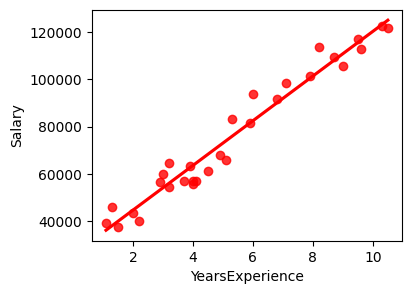

In [168]:
plt.figure(figsize=(4,3))
sns.regplot(data=df, x=x, y=y, ci=None,color='red')
plt.show()

In [169]:
# converting 'x' which is years experience into 1-D array
x = np.array(x)
new_x = x.flatten()
new_x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [170]:
# converting 'y' which is salary into 1-D array
y = np.array(y)
new_y = y.flatten()
new_y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [171]:
y_test = np.array(y_test)
y_test_new = y_test.flatten()
y_test_new

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [172]:
pred = np.array(pred)
new_pred = pred.flatten()
new_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

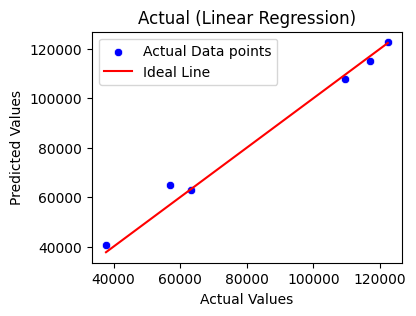

In [173]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=y_test_new, y=new_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()